In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda , Flatten
from keras.optimizers import Adam , RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import re

In [2]:
test = pd.read_csv("./test.csv" , delimiter = ',')
train = pd.read_csv("./train.csv" , delimiter = ',')

X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [3]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

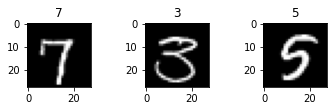

In [4]:
#Paso las imagenes de tensores de 1d a 2d (matriz de 28 * 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28)


for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [5]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape


(42000, 28, 28, 1)

In [6]:
# Para normalizar la informacion.
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

### One hot encoding

In [7]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

C:\Users\tomas\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


([<matplotlib.axis.XTick at 0x26bc87933d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

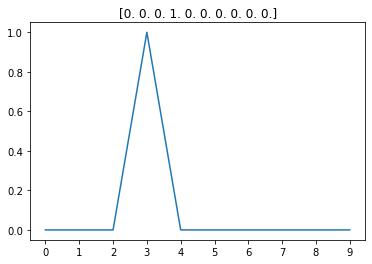

In [8]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10))

#### Diseno de la red Neuronal

In [9]:
seed = 43
np.random.seed(seed)

In [10]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

Lets create a simple model from Keras Sequential layer.

<li>Lambda layer performs simple arithmetic operations like sum, average, exponentiation etc.

In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) format. (In theano colour channel comes first)</li>

<li>Flatten will transform input into 1D array.
Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer. In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.</li>

In [11]:
model = Sequential()
model.add( Lambda(standardize, input_shape = (28,28,1)))
model.add( Flatten())
model.add( Dense(10, activation = 'softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


### Compile network
Before making network ready for training we have to make sure to add below things:

<li>A loss function: to measure how good the network is </li>

<li>An optimizer: to update network as it sees more data and reduce loss value</li>

<li>Metrics: to monitor performance of network</li>

In [12]:
from keras.optimizers import RMSprop
model.compile( optimizer = RMSprop(learning_rate = 0.001), loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [13]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

#### Creo dataset de validacion

In [14]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
print(X_train.shape)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

(37800, 28, 28, 1)


In [15]:
batches

In [16]:
print(X_val.shape)
print(y_train.shape)
history=model.fit(
    x = X_train
  , y = y_train
  ,validation_data = (X_val,y_val)
  , epochs=3
  , batch_size = 64)

(4200, 28, 28, 1)
(37800, 10)
Epoch 1/3
591/591 [==============================] - 2s 2ms/step - loss: 0.4445 - accuracy: 0.8669 - val_loss: 0.3407 - val_accuracy: 0.8967
Epoch 2/3
591/591 [==============================] - 1s 2ms/step - loss: 0.3014 - accuracy: 0.9136 - val_loss: 0.3122 - val_accuracy: 0.9126
Epoch 3/3
591/591 [==============================] - 1s 2ms/step - loss: 0.2864 - accuracy: 0.9185 - val_loss: 0.3007 - val_accuracy: 0.9162


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

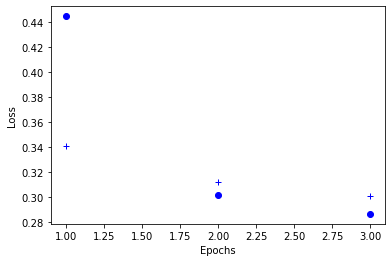

In [18]:
#Muestro el error de validacion y del training set.

import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [19]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Fully Connected Model
Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks. Adding another Dense Layer to model.

In [20]:
fc = get_fc_model()
fc.optimizer.lr = 0.01

In [21]:
history=model.fit(
    x = X_train
  , y = y_train
  ,validation_data = (X_val,y_val)
  , epochs=1
  , batch_size = 64)

591/591 [==============================] - 1s 2ms/step - loss: 0.2766 - accuracy: 0.9220 - val_loss: 0.3043 - val_accuracy: 0.9124


In [24]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model2 = get_cnn_model()
model2.optimizer.lr=0.01

history=model2.fit(
    x = X_train
  , y = y_train
  ,validation_data = (X_val,y_val)
  , epochs=1
  , batch_size = 64)

591/591 [==============================] - 49s 83ms/step - loss: 0.2456 - accuracy: 0.9229 - val_loss: 0.1845 - val_accuracy: 0.9474
